In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train[0].shape

(28, 28)

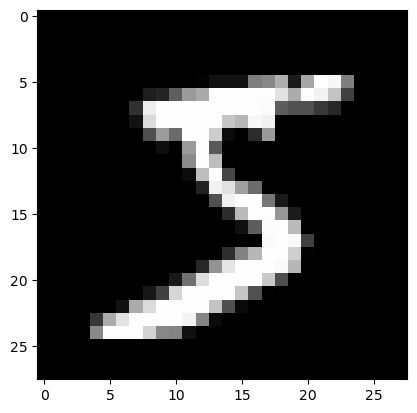

In [4]:
plt.imshow(X_train[0], cmap='gray')

In [5]:
y_train[0]

5

In [6]:
pd.Series(y_train).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

In [7]:
import tensorflow as tf

y_train_onehot = tf.keras.utils.to_categorical(y_train, num_classes=10)

In [8]:
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import RMSprop

def create_cnn_model():
    cnn_model = models.Sequential()
    cnn_model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation='relu', input_shape=(28,28,1)))
    #If RGB feature maps, input_shape=(28, 28, 3)
    cnn_model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation='relu'))
    cnn_model.add(MaxPool2D(pool_size=(2,2)))
    cnn_model.add(Dropout(0.25))

    cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'))
    cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'))
    cnn_model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
    cnn_model.add(Dropout(0.25))

    cnn_model.add(Flatten())
    cnn_model.add(Dense(256, activation = "relu"))
    cnn_model.add(Dropout(0.5))
    cnn_model.add(Dense(10, activation = "softmax"))
    #If binary classification, units=1 and activation='sigmoid'

    cnn_model.compile(optimizer=RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08), loss='categorical_crossentropy', metrics=['categorical_accuracy'])
    #If binary classification, loss='binary_crossentropy' and metrics=['binary_accuracy']

    return cnn_model

In [9]:
from scikeras.wrappers import KerasClassifier

model = KerasClassifier(model=create_cnn_model, verbose=0)

In [10]:
X_train = X_train/255
X_test = X_test/255

In [11]:
model.fit(X_train, y_train_onehot)

KerasClassifier(
	model=<function create_cnn_model at 0x000002906D7C1E40>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

In [12]:
y_test_pred = model.predict(X_test)
y_test_pred

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [13]:
y_test_pred = np.argmax(y_test_pred, axis=1)
y_test_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.95      1.00      0.97      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [15]:
confusion_matrix(y_test,y_test_pred)

array([[ 969,    1,    1,    1,    0,    1,    4,    2,    1,    0],
       [   0, 1128,    0,    5,    0,    0,    1,    1,    0,    0],
       [   0,    0, 1018,    9,    0,    0,    0,    5,    0,    0],
       [   0,    0,    0, 1009,    0,    0,    0,    1,    0,    0],
       [   0,    0,    4,    0,  963,    0,    3,    1,    2,    9],
       [   0,    0,    0,   14,    0,  877,    1,    0,    0,    0],
       [   6,    2,    0,    1,    1,    2,  945,    0,    1,    0],
       [   0,    1,    5,    2,    0,    0,    0, 1019,    1,    0],
       [   2,    0,    2,    7,    1,    1,    0,    2,  958,    1],
       [   1,    1,    0,   13,    3,    3,    0,    7,    7,  974]],
      dtype=int64)

In [16]:
y_test_pred_proba = model.predict_proba(X_test)
y_test_pred_proba

array([[1.63905298e-08, 6.28775698e-09, 7.89780259e-08, ...,
        9.99999285e-01, 4.25177538e-09, 2.54564242e-07],
       [1.16033050e-08, 1.21847359e-06, 9.99998689e-01, ...,
        9.97113850e-11, 4.36090231e-09, 7.07030517e-13],
       [1.85150147e-05, 9.98588860e-01, 6.01197462e-05, ...,
        2.91685021e-04, 1.08409949e-04, 5.85844355e-05],
       ...,
       [6.63535962e-11, 1.33252718e-06, 1.16773577e-10, ...,
        5.67975569e-08, 1.50758055e-07, 1.71180818e-06],
       [3.85918020e-10, 1.21328669e-10, 1.63906302e-12, ...,
        4.83424079e-10, 6.85378745e-06, 1.27835058e-08],
       [6.39809850e-09, 9.16275589e-09, 5.24609760e-08, ...,
        1.18002075e-11, 4.73814595e-07, 2.78978264e-11]], dtype=float32)

Text(0.5, 1.0, 'Receiver Operating Characteristic - CNNClassifier (Tensorflow)')

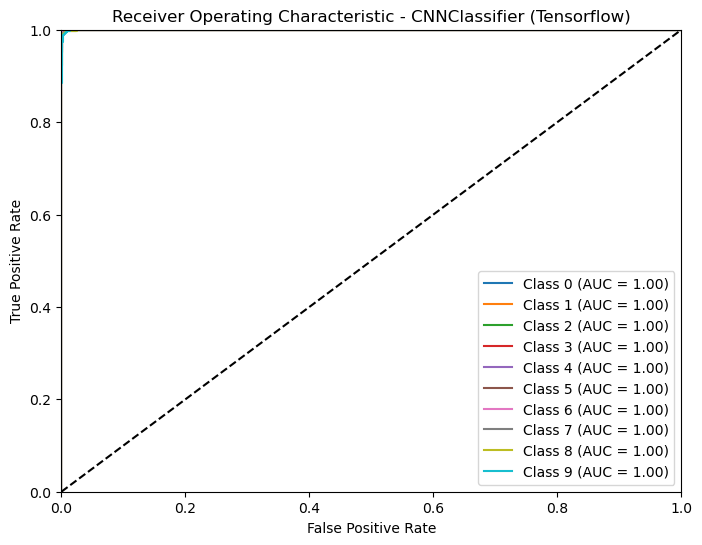

In [17]:
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(8, 6))
for class_idx in range(len(model.classes_)):
    y_true = (y_test == model.classes_[class_idx]).astype(int)
    y_pred_proba = y_test_pred_proba[:, class_idx]
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    plt.plot(fpr, tpr, label=f'Class {model.classes_[class_idx]} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc='lower right')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - CNNClassifier (Tensorflow)')